![alt text](task_1.png "Task 1")

In [10]:
from typing import Tuple

import IPython.display
import sympy as sp
from sympy.vector import CoordSys3D
import numpy as np

t = sp.symbols('t')

# Init constants
phi_0 = np.pi / 3
omega_v = 2

r_a_v = 21
r_b_v = 25
o3_f_v = 20

ab_v = 54
bc_v = 52
cd_v = 69
ce_v = 35
ef_v = 32
ac_v = cd_v / 3

a_v = 56
b_v = 10
c_v = 26
d_v = 16
e_v = 25

b_x_s, b_y_s = sp.symbols('b_x b_y')
c_x_s, c_y_s = sp.symbols('c_x c_y')
d_x_s, d_y_s = sp.symbols('d_x d_y')
e_x_s, e_y_s = sp.symbols('e_x e_y')


def find_point_by_geom_method(function1, function2, point_x, point_y, is_linear=False, arg=1) -> Tuple[float, float]:
    """
    paste here a system to find functions for coordinates of the point.

    :param arg = 1 if is_linear -> takes the first root; if is_linear = False(default) -> takes the second root;
    if arg = 0 then from linsolve() takes the first (complex if exists) root.
    """
    if is_linear:
        solutions = sp.linsolve((function1, function2), [point_x, point_y])
        point_x = solutions.args[0][0]
        point_y = solutions.args[0][1]
    else:
        solutions = sp.nonlinsolve([function1, function2], [point_x, point_y])
        print(solutions)
        # the firsts returned solution from nonlinsolve is complex roots (if exists) of the system, therefore we get the second one.
        point_x = solutions.args[arg][0]
        point_y = solutions.args[arg][1]

    return point_x, point_y


def find_vel_acc_for_point(x, y):
    """find velocity and velocities from coordinates of the point. The function returns velocity_x, velocity_y, acceleration_x, acceleration_y"""
    # velocity
    dot_x = sp.diff(x, t)
    dot_y = sp.diff(y, t)
    #acceleration
    ddot_x = sp.diff(dot_x, t)
    ddot_y = sp.diff(dot_y, t)
    return dot_x, dot_y, ddot_x, ddot_y


omega, r_a, r_b, o3_f, ab, bc, cd, ce, ef, ac, a, b, c, d, e = sp.symbols(
    'omega, r_a, r_b, o3_f, ab, bc, cd, ce, ef, ac, a, b, c, d, e')
subs_values = [(omega, omega_v), (r_a, r_a_v), (r_b, r_b_v), (o3_f, o3_f_v), (ab, ab_v), (bc, bc_v), (cd, cd_v),
               (ce, ce_v), (ef, ef_v), (ac, ac_v), (a, a_v), (b, b_v), (c, c_v), (d, d_v), (e, e_v)]
phi = phi_0 + omega * t
o1_x = 0
o1_y = 0
o2_x = a
o2_y = -c

o3_x = a + b
o3_y = d + e
O1 = CoordSys3D('O1')
#coordinates for point A
a_x = r_a * sp.cos(phi)
a_y = r_a * sp.sin(phi)
# velocity and acceleration for point A
# v_a_x, v_a_y, acc_a_x, acc_a_y = find_vel_acc_for_point(x_a, y_a)
b_x, b_y = sp.symbols('b_x, b_y', real=True)

# system functions for B using the circuits method
func_for_b1 = (b_x - a_x) ** 2 + (b_y - a_y) ** 2 - ab ** 2
func_for_b2 = (o2_x - b_x) ** 2 + (o2_y - b_y) ** 2 - r_b ** 2
b_x, b_y = find_point_by_geom_method(func_for_b1, func_for_b2, b_x, b_y)
IC_x, IC_y = sp.symbols('IC_x, IC_y', real=True)

# # find lines intersection (continue of the radius vectors O2B and O1A) to get IC using the formula
# # (x - x1) * (y2 - y1) - (x2 - x1) * (y - y1) = 0
func_for_IC_1 = (IC_x - a_x) * (o1_y - a_y) - (o1_x - a_x) * (IC_y - a_y)
func_for_IC_2 = (IC_x - b_x_s) * (o2_y - b_y_s) - (o2_x - b_x_s) * (IC_y - b_y_s)
IC_x, IC_y = find_point_by_geom_method(func_for_IC_1, func_for_IC_2, IC_x, IC_y, is_linear=True)

# system functions for C using the circuits method
c_x, c_y = sp.symbols('c_x, c_y')
func_for_c1 = (c_x - a_x) ** 2 + (c_y - a_y) ** 2 - ac ** 2
func_for_c2 = (c_x - b_x_s) ** 2 + (c_y - b_y_s) ** 2 - bc ** 2
c_x, c_y = find_point_by_geom_method(func_for_c1, func_for_c2, c_x, c_y)

# system functions for D using geometrical method (intersection of a line y=d and circuit (C, CD))
d_x, d_y = sp.symbols('d_x, d_y', real=True)
func_for_d1 = d_y - d
func_for_d2 = (c_x_s - d_x) ** 2 + (c_y_s - d_y) ** 2 - cd ** 2
d_x, d_y = find_point_by_geom_method(func_for_d1, func_for_d2, d_x, d_y, arg=0)

# point E
vec_CD_x = d_x_s - c_x_s
vec_CD_y = d_y_s - c_y_s
abs_CD = sp.sqrt(vec_CD_x ** 2 + vec_CD_y ** 2)
e_x = c_x_s + vec_CD_x * ce / abs_CD
e_y = c_y_s + vec_CD_y * ce / abs_CD

#point F
f_x, f_y = sp.symbols('f_x, f_y', real=True)

func_for_f1 = (f_x - o3_x) ** 2 + (f_y - o3_y) ** 2 - o3_f ** 2
func_for_f2 = (f_x - e_x_s) ** 2 + (f_y - e_y_s) ** 2 - ef ** 2
f_x, f_y = find_point_by_geom_method(func_for_f1, func_for_f2, f_x, f_y, arg=0)




{((0.5*a**2 + 0.5*ab**2 + 0.5*c**2 - 0.5*r_a**2 - 0.5*r_b**2 + (-(1.0*a + 0.866025403784439*r_a*sin(omega*t) - 0.5*r_a*cos(omega*t))*sqrt(-0.25*a**4 - 0.866025403784439*a**3*r_a*sin(omega*t) + 0.5*a**3*r_a*cos(omega*t) + 0.5*a**2*ab**2 - 0.5*a**2*c**2 - 0.5*a**2*c*r_a*sin(omega*t) - 0.866025403784439*a**2*c*r_a*cos(omega*t) + 0.433012701892219*a**2*r_a**2*sin(2*omega*t) + 0.25*a**2*r_a**2*cos(2*omega*t) - a**2*r_a**2 + 0.5*a**2*r_b**2 + 0.866025403784439*a*ab**2*r_a*sin(omega*t) - 0.5*a*ab**2*r_a*cos(omega*t) - 0.866025403784439*a*c**2*r_a*sin(omega*t) + 0.5*a*c**2*r_a*cos(omega*t) - 0.5*a*c*r_a**2*sin(2*omega*t) + 0.866025403784439*a*c*r_a**2*cos(2*omega*t) - 0.866025403784439*a*r_a**3*sin(omega*t) + 0.5*a*r_a**3*cos(omega*t) + 0.866025403784439*a*r_a*r_b**2*sin(omega*t) - 0.5*a*r_a*r_b**2*cos(omega*t) - 0.25*ab**4 + 0.5*ab**2*c**2 + 0.5*ab**2*c*r_a*sin(omega*t) + 0.866025403784439*ab**2*c*r_a*cos(omega*t) + 0.5*ab**2*r_a**2 + 0.5*ab**2*r_b**2 - 0.25*c**4 - 0.5*c**3*r_a*sin(omega*t) -

The mechanism is Assur group.
First, lets find instantaneous centre for the ABC body. To do this, find instantaneous velocity of the points A and B.

In [11]:
# from sympy.physics.vector import init_vprinting
# from sympy.physics.vector import *
#
# init_vprinting(pretty_print=False)
#
# # phi_0, omega, r_a, r_b, o3_f, ab, bc, cd, ce, ef, a, b, c, d, e = init_variables()
# phi_0, omega, r_a, r_b, o3_f, ab, bc, cd, ce, ef, a, b, c, d, e = sp.symbols(
#     'phi_0 omega r_a r_b o3_f ab bc cd ce ef a b c d e')
#
# # suppose ac = 20
# ac = 20
#
# t, theta, alfa = dynamicsymbols('t theta alfa')
# phi = omega * t
# point_O_1_frame = ReferenceFrame('O_1')
# point_O_2_frame = ReferenceFrame('O_2')
# point_IC_frame = ReferenceFrame('IC')
#
# point_A_frame = ReferenceFrame('A')
# point_B_frame = ReferenceFrame('B')
# point_C_frame = ReferenceFrame('C')
#
# point_A_frame.orient(point_O_1_frame, 'Axis', [phi, point_O_1_frame.z])
# point_B_frame.orient(point_O_2_frame, 'Axis', [theta, point_O_2_frame.z])
# point_C_frame.orient(point_B_frame, 'Axis', [alfa, point_B_frame.z])
#
# point_O_1 = Point('O_1')
# point_O_2 = Point('O_2')
# point_A = Point('A')
# point_B = Point('B')
# point_C = Point('C')
#
# point_A.set_pos(point_O_1, r_a * point_O_1_frame.x * sp.cos(phi) + r_a * point_O_1_frame.y * sp.sin(phi))
# point_B.set_pos(point_O_2, r_b * point_O_2_frame.x * sp.cos(theta) + r_b * point_O_2_frame.y * sp.sin(theta))
# point_B.set_pos(point_A, ab * point_A_frame.x)
#
# # point_B.set_pos(point_O_1, point_B_x*point_O_1_frame.x + point_B_y*point_O_1_frame.y)
#
# point_C.set_pos(point_A, ac * point_A_frame.x)
# point_C.set_pos(point_B, ab * point_B_frame.x)
#
# print(point_A.pos_from(point_O_1))

In [26]:
from typing import List

## translation a point from sympy format into array
dt = 50
t_linspace = np.linspace(0, 5, dt)
phi_linspace = phi_0 + omega * t_linspace


def translate_point(point_sp_expr, optional_data: List[Tuple[sp.Symbol, np.ndarray]] = None,
                    optional_values: List[Tuple[sp.Symbol, float]] = None):
    i = 0
    point_data = np.empty(shape=(t_linspace.size, 2), dtype=float)
    break_time_stamp = np.empty(shape=1, dtype=float)
    for current_t in t_linspace:
        opt = [(k, v[i]) for k, v in optional_data] if optional_data is not None else []
        vals = [(k, v) for k, v in optional_values] if optional_values is not None else []

        x = point_sp_expr[0].subs([(t, current_t)] + opt + vals)
        y = point_sp_expr[1].subs([(t, current_t)] + opt + vals)
        try:
            x = float(x)
            y = float(y)
        except TypeError:
            x = 0
            y = 0
            break_time_stamp = np.append(break_time_stamp, current_t)
        point_data[i] = [x, y]
        i = i + 1
    if break_time_stamp.size == 0:
        return point_data, t_linspace
    else:
        new_t_linspace = np.linspace(0, break_time_stamp[0], dt)
        return point_data, new_t_linspace


# find points data for plots
point_A_data = translate_point([a_x, a_y], optional_values=subs_values)
point_B_data, t_linspace = translate_point([b_x, b_y], optional_values=subs_values)
point_IC_data, t_linspace = translate_point([IC_x, IC_y],
                                            optional_data=[(b_x_s, point_B_data[:, 0]), (b_y_s, point_B_data[:, 1])],
                                            optional_values=subs_values)
point_C_data, t_linspace = translate_point([c_x, c_y],
                                           optional_data=[(b_x_s, point_B_data[:, 0]), (b_y_s, point_B_data[:, 1])],
                                           optional_values=subs_values)
point_D_data, t_linspace = translate_point([d_x, d_y],
                                           optional_data=[(c_x_s, point_C_data[:, 0]), (c_y_s, point_C_data[:, 1])],
                                           optional_values=subs_values)
point_E_data, t_linspace = translate_point([e_x, e_y],
                                           optional_data=[(c_x_s, point_C_data[:, 0]), (c_y_s, point_C_data[:, 1]),
                                                          (d_x_s, point_D_data[:, 0]), (d_y_s, point_D_data[:, 1])],
                                           optional_values=subs_values)
point_F_data, t_linspace = translate_point([f_x, f_y],
                                           optional_data=[(e_x_s, point_E_data[:, 0]), (e_y_s, point_E_data[:, 1])],
                                           optional_values=subs_values)


In [25]:
# work with velocities and accelerations
def normalize_acc(acc, vels):
    """ Converts the acceleration into normal and tangent accelerations, based on the velocity direction"""
    # just iterator
    i = 0
    # tangent vector
    tau = np.empty(shape=vels.shape)
    # array of tangent accelerations
    tang_a = np.empty(shape=vels.shape)
    for v in vels:
        dot = np.dot(acc[i], v)
        norm = np.linalg.norm(v)
        new_a_t = np.divide(dot, norm)
        tau[i] = np.divide(v, norm)
        tang_a[i] = new_a_t * tau[i]
        print('\nv:\n', v, '\nacc:\n', acc[i], '\ndot:\n', dot, '\nnorm v:\n', norm, '\n tau:\n', tau[i])
        i = i + 1
    # the easiest way to find normal acceleration
    normal_a = acc - tang_a
    return normal_a, tang_a


def find_vel_and_acc(point_data):
    vels = np.gradient(point_data, dt, axis=0)
    acc = np.gradient(vels, dt, axis=0)
    normal_a, tang_a = normalize_acc(acc, vels)
    return vels, acc, normal_a, tang_a


def find_ang_vel(axis_data, point_data, point_vel):
    r = point_data - axis_data
    ang_vel = np.empty(shape=(len(point_data), 1))
    for i in np.arange(0, len(point_data)):
        ang_vel[i] = np.cross(r[i], point_vel[i])
    return ang_vel


vels_a, acc_a, norm_a, tang_a = find_vel_and_acc(point_A_data)
vels_b, acc_b, norm_b, tang_b = find_vel_and_acc(point_B_data)
vels_c, acc_c, norm_c, tang_c = find_vel_and_acc(point_C_data)
vels_d, acc_d, norm_d, tang_d = find_vel_and_acc(point_D_data)
vels_e, acc_e, norm_e, tang_e = find_vel_and_acc(point_E_data)
vels_f, acc_f, norm_f, tang_f = find_vel_and_acc(point_F_data)

ang_vel_a = find_ang_vel([o1_x, o1_y], point_A_data, vels_a)
print(ang_vel_a)

/home/asiia/Documents/hw_2_task_1/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:1144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = np.asanyarray(f)


ValueError: could not broadcast input array from shape (50,2) into shape (50,)

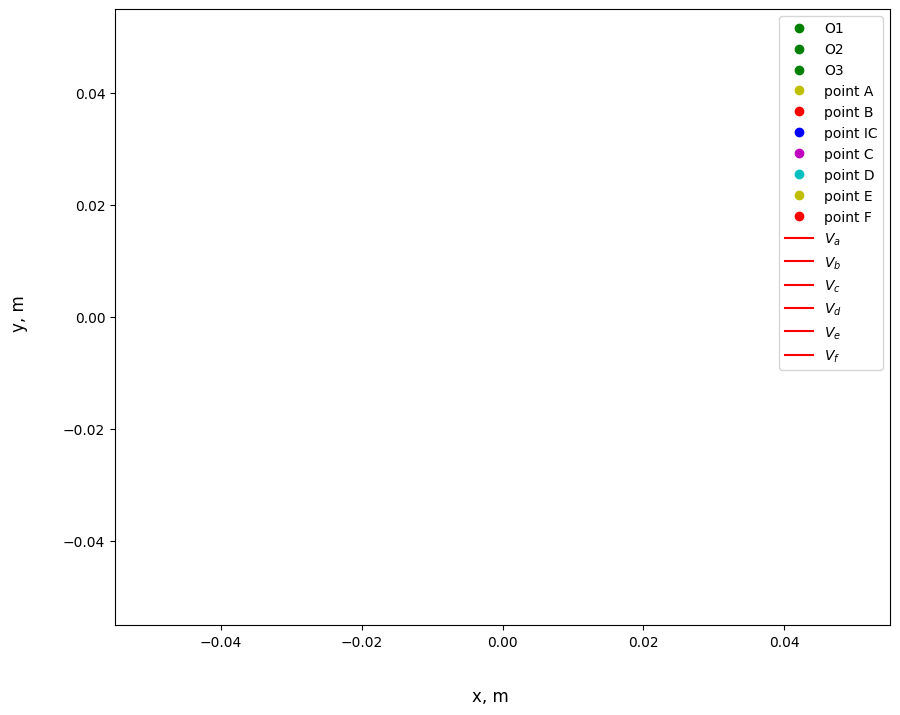

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [28]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 8))
xdata, ydata = [], []

o1_plot, = plt.plot([], [], 'go', label="O1")
o2_plot, = plt.plot([], [], 'go', label="O2")
o3_plot, = plt.plot([], [], 'go', label="O3")

# plots of points
a_plot, = plt.plot([], [], 'yo', label="point A")
b_plot, = plt.plot([], [], 'ro', label="point B")
ic_plot, = plt.plot([], [], 'bo', label="point IC")
c_plot, = plt.plot([], [], 'mo', label="point C")
d_plot, = plt.plot([], [], 'co', label="point D")
e_plot, = plt.plot([], [], 'yo', label="point E")
f_plot, = plt.plot([], [], 'ro', label="point F")

# plots of velocity vectors
a_v, = plt.plot([], [], 'r', label="$V_a$")
b_v, = plt.plot([], [], 'r', label="$V_b$")
c_v, = plt.plot([], [], 'r', label="$V_c$")
d_v, = plt.plot([], [], 'r', label="$V_d$")
e_v, = plt.plot([], [], 'r', label="$V_e$")
f_v, = plt.plot([], [], 'r', label="$V_f$")

#
# a_a, = plt.plot([], [], 'g', label="Acceleration a")
# a_at, = plt.plot([], [], 'y', label="$a_{\\tau}$")
# b_an, = plt.plot([], [], 'orange', label="$a_{n}$")
# b_a, = plt.plot([], [], 'g', label="Acceleration a")
# b_at, = plt.plot([], [], 'y', label="$a_{\\tau}$")
# b_an, = plt.plot([], [], 'orange', label="$a_{n}$")
# c_a, = plt.plot([], [], 'g', label="Acceleration a")
# c_at, = plt.plot([], [], 'y', label="$a_{\\tau}$")
# c_an, = plt.plot([], [], 'orange', label="$a_{n}$")

# abc, = plt.plot([], [], 'gray')
# abc_polygon = plt.fill_between([0, 0, 0], [0, 0, 0], color='grey')

ao, = plt.plot([], [], 'gray')
bo, = plt.plot([], [], 'gray')
fo, = plt.plot([], [], 'gray')
cd, = plt.plot([], [], 'gray')
ef, = plt.plot([], [], 'gray')
ax.legend()


def init():
    ax.set_xlim(-50, 150)
    ax.set_ylim(-100, 100)
    o1_plot.set_data([o1_x], [o1_y])
    o2_plot.set_data([o2_x], [o2_y])
    draw_rot_axes(o3_plot, o3_x, o3_y)
    return a_v, b_v, c_v, d_v, e_v, f_v, a_plot, b_plot, c_plot, d_plot, e_plot, f_plot, ic_plot, ao, bo, cd, ef,


def draw_point(frame, point_plot, point_data):
    if point_data[0] == point_data[1] == 0:
        pass
    else:
        point_plot.set_data([point_data[0], point_data[1]])


def draw_rot_axes(point_plot, x, y):
    point_plot.set_data([x], [y])
    ax.fill_between([x, x - 2.5, x + 2.5, x], [y, y - 5, y - 5, y], facecolor='grey', linewidth=0)


def draw_velocity(vel_plot, point_pos_data, point_vel_data):
    vel_plot.set_data([point_pos_data[0] + point_vel_data[0], point_pos_data[0]],
                      [point_pos_data[1] + point_vel_data[1], point_pos_data[1]])


def draw_acc(acc_plot, point_pos_data, point_acc_data):
    acc_plot.set_data([point_pos_data[0] + point_acc_data[0], point_pos_data[0]],
                      [point_pos_data[1] + point_acc_data[1], point_pos_data[1]])


#
# def draw_acc_t(acc_plot, point_pos_data, point_acc_data):
#     acc_plot.set_data([point_pos_data[0] + point_acc_data[0], point_pos_data[0]],
#                   [point_pos_data[1] + point_acc_data[1], point_pos_data[1]])
#
#
# def draw_acc_n(acc_plot, point_pos_data, point_acc_data):
#     acc_plot.set_data([point_pos_data[0] + point_acc_data[0], point_pos_data[0]],
#                   [point_pos_data[1] + point_acc_data[1], point_pos_data[1]])


def update(frame):
    ax.set_title(f'phi: {phi[frame]}')
    draw_point(frame, a_plot, point_A_data[frame])
    draw_point(frame, b_plot, point_B_data[frame])
    draw_point(frame, c_plot, point_C_data[frame])
    draw_point(frame, d_plot, point_D_data[frame])
    draw_point(frame, e_plot, point_E_data[frame])
    draw_point(frame, f_plot, point_F_data[frame])
    draw_point(frame, ic_plot, point_IC_data[frame])

    abc_coordinates = [
                          point_A_data[frame][0],
                          point_B_data[frame][0],
                          point_C_data[frame][0],
                          point_A_data[frame][0],
                      ], [
                          point_A_data[frame][1],
                          point_B_data[frame][1],
                          point_C_data[frame][1],
                          point_A_data[frame][1],
                      ]

    ax.collections.clear()
    ax.fill_between(abc_coordinates[0], abc_coordinates[1], facecolor='grey', linewidth=0)

    draw_rot_axes(o1_plot, o1_x, o1_y)
    draw_rot_axes(o2_plot, o2_x, o2_y)
    draw_rot_axes(o3_plot, o3_x, o3_y)

    ao.set_data([
        point_A_data[frame][0], o1_x],
        [point_A_data[frame][1], o1_y])
    bo.set_data([
        point_B_data[frame][0], o2_x],
        [point_B_data[frame][1], o2_y])
    fo.set_data([
        point_F_data[frame][0], o3_x],
        [point_F_data[frame][1], o3_y])
    cd.set_data([
        point_C_data[frame][0], point_D_data[frame][0]],
        [point_C_data[frame][1], point_D_data[frame][1]])
    ef.set_data([
        point_E_data[frame][0], point_F_data[frame][0]],
        [point_E_data[frame][1], point_F_data[frame][1]])

    draw_velocity(a_v, point_A_data[frame], vels_a[frame])
    draw_velocity(b_v, point_B_data[frame], vels_b[frame])
    draw_velocity(c_v, point_C_data[frame], vels_c[frame])
    draw_velocity(d_v, point_D_data[frame], vels_d[frame])
    draw_velocity(e_v, point_E_data[frame], vels_e[frame])
    draw_velocity(f_v, point_F_data[frame], vels_f[frame])
    return a_plot, b_plot, c_plot, d_plot, e_plot, f_plot, ic_plot, ao, bo, cd, ef, a_v, b_v, c_v, d_v, e_v, f_v,


fig.supxlabel("x, m")
fig.supylabel("y, m")
ani = FuncAnimation(fig, update, frames=t_linspace.size,
                    init_func=init, interval=100, blit=False)
plt.show()

from IPython.display import HTML

ani.save("results_1.gif")
# ani.save("results_1.mp4")
